<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [53]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import sklearn.linear_model as lm
import math
from scipy import stats
import statistics



### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [34]:
# Read CSV
house_csv = pd.read_csv("Sacramento_transactions.csv")
house_csv.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [25]:
# ANSWER

#Price because we want to know the value of houses on each street

#### 2.2 List all possible variables which might be Predictor variable.

In [26]:
# ANSWER

#Street, beds,baths, sq_ft, 

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [35]:
# ANSWER
house_csv.corr()


,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

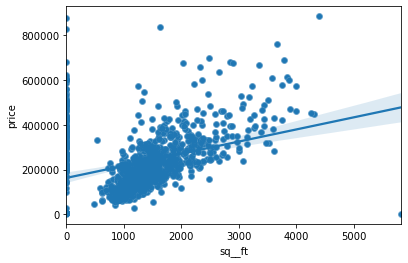

In [28]:
# ANSWER
import seaborn as sns
sns.scatterplot(x='sq__ft', y='price', data = house_csv)

np.polyfit( x = house_csv['sq__ft'],y= house_csv['price'], deg = 1)
sns.regplot(x='sq__ft', y='price', data =house_csv, scatter_kws ={'alpha':0.5});
plt.show()

In [29]:
np.polyfit( x = house_csv['sq__ft'],y= house_csv['price'], deg = 1)
np.polyfit

<function numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)>

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [36]:
# ANSWER
from sklearn.linear_model import LinearRegression
x = np.array(house_csv['sq__ft']).reshape(-1,1)
y = 118 * x + 51800
lm = LinearRegression()
lm.fit(x,y)
X1 = np.array(house_csv['sq__ft']).reshape(-1,1)
y_pred = lm.predict(X1)
residutal = X1 - y_pred

def predict_price(sq__ft):
    price = 118 * sq__ft + 58100
    return price

predicted_prices = house_csv['sq__ft'].apply(predict_price)

current_prices = house_csv['price']

residual = current_prices - predicted_prices
residual

0      -97526
1     -127594
2      -83148
3      -89329
4      -70246
        ...  
980    -94715
981      1614
982     33412
983    -21629
984     16922
Length: 985, dtype: int64

In [31]:
np.abs(residual) #to get rid of the negative numbers. these are the absolute values

0       97526
1      127594
2       83148
3       89329
4       70246
        ...  
980     94715
981      1614
982     33412
983     21629
984     16922
Length: 985, dtype: int64

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [67]:
# ANSWER
X =  house_csv['sq__ft']
Y = house_csv['price']

X
Y

0       59222
1       68212
2       68880
3       69307
4       81900
        ...  
980    232425
981    234000
982    235000
983    235301
984    235738
Name: price, Length: 985, dtype: int64

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [54]:
# ANSWER
X = house_csv['sq__ft']
x_bar = statistics.mean(X)
Y = house_csv['price']
y_bar= statistics.mean(Y)

beta_1 = ((Y-y_bar)*(X-x_bar)).sum() / ((X-x_bar)**2).sum()
beta_1

54.158639688530755

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [55]:
# ANSWER
beta_0 = y_bar -(beta_1 * x_bar)
beta_0

162930.16140699777

##### 2.7.C Find what (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [56]:
# ANSWER

y_hat = beta_0 + (beta_1 * X)
y_hat 

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [57]:
# ANSWER
residual =  Y - y_hat
residual

0     -148984.784187
1     -157921.293924
2     -137160.438599
3     -139766.322422
4     -124194.597239
           ...      
980    -53986.859897
981     -8922.472227
982      6212.932732
983    -18886.469282
984      -956.228663
Length: 985, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [58]:
# ANSWER
def r_square(residual_sum_square, total_sum_square):
    residual_sum_square = sum((Y-y_hat)**2)
    total_sum_square = sum((Y-y_bar)**2)
    
    return 1- (residual_sum_square/ total_sum_square)

r_square(1,2)


0.11148717682951337

##### 2.7.F [BONUS] Draw Plot of Predicted Line

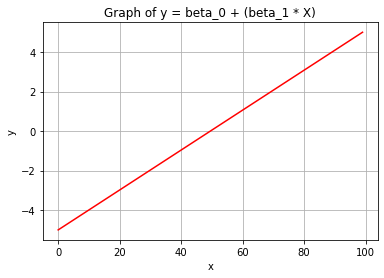

In [64]:
# ANSWER
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(-5,5,100)
y = beta_0 + (beta_1*X)

plt.plot( x,'-r', label='y = beta_0 + (beta_1 * X)')
plt.title('Graph of y = beta_0 + (beta_1 * X)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

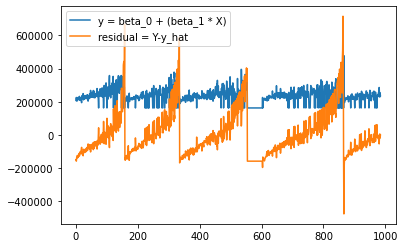

In [91]:
# ANSWER
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(-400000,400000,200)
y = beta_0 + (beta_1*X)
plt.plot(beta_0 + (beta_1*X),linestyle = '-', label='y = beta_0 + (beta_1 * X)')
plt.legend(loc='upper left')


residual = Y-y_hat
plt.plot(Y-y_hat,linestyle = '-', label= 'residual = Y-y_hat' )
plt.legend(loc='upper left')


### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [65]:
# ANSWER

beta_1
beta_0
predicted_price = beta_1 * 1204 + beta_0
predicted_price

228137.1635919888



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



